# Categories, Actors, and Ratings vs Worldwide Revenue

In [6]:
(https://www.reddwarf.co.uk/tv/images/microsoft.png)

SyntaxError: invalid syntax (<ipython-input-6-bd62949bd3be>, line 1)

### Business Question:

Micosoft is interested in creating original video content. They've hired us to understand what films are doing best at the box office and deliver actionable recommendations.

### Findings and Recommendations: 
DC and Marvel films do exceedingly well at the box office, consistently delivering the greatest worldwide . 
Turn video games into movie story lines
Reasoning: Comics do exceedingly well (DC + Marvel),
DC owned by WarnerBros (HBO is their virtual distribution platform)
Marvel owned by Disney (Disney+ is their virtual distribution platform)
E-sports + gambling and viewing becoming increasingly popular
One popular reason for watching games is for the storyline - similar to movies
Strong association between gaming and microsoft (XBox) + pre-existing relationships with developers + customer association
Large target audience - children to adult


In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('seaborn')

In [3]:
import mysql.connector

con = mysql.connector.connect(user='hbs-student', password='super-secure-password?',
                              host='hbs-ds-060120.c1doesqrid0e.us-east-1.rds.amazonaws.com',
                              database='movies')
cur = con.cursor()

Are there any movie categories that generate the greatest worldwide revenue? 

In [4]:
df_joint_rev = pd.read_csv('joined_revenue')
df_joint_rev_50_largest=df_joint_rev.nlargest(50,'worldwide_gross')
movie_title_list = list(df_joint_rev_50_largest['movie_title'])
movie_descr = ['Avatar',
'Titanic',
'Star Wars',
'Marvel',
'Marvel',
'Marvel',
'Marvel',
'Harry Potter',
'Harry Potter',
'Star Wars',
'Star Wars',
'Jurassic Park',
'Disney Animation ',
'Disney Animation ',
'Disney Animation ',
'Disney Animation ',
'Marvel',
'Universal Animation',
'Marvel',
'DC comics',
'Lord of the Rings',
'Marvel',
'Marvel',
'James Bond',
'Marvel',
'DC comics',
'Disney Animation ',
'Pirates of the Carribbean',
'Star Wars',
'Pirates of the Carribbean',
'Jurassic Park',
'Universal Animation',
'Disney Animation ',
'Star Wars',
'Disney Animation ',
'Disney Animation ',
'Disney Animation ',
'Lord of the Rings',
'DC comics',
'Disney Animation ',
'Harry Potter',
'Universal Animation',
'Disney Animation ',
'Pirates of the Carribbean',
'Disney Animation ',
'Jumanji',
'Harry Potter',
'Harry Potter',
'Lord of the Rings',
'Lord of the Rings']
d_top50_title_descr={'movie_title_list':movie_title_list,'movie_descr':movie_descr}
df_top50_title_descr=pd.DataFrame(data=d_top50_title_descr)
df_rev_top_50_cat = df_joint_rev_50_largest.merge(df_top50_title_descr, how='inner',left_on=['movie_title'], right_on=['movie_title_list'])
df_rev_top_50_cat_skinny = df_rev_top_50_cat.drop(['Unnamed: 0', 'movie_title','production_budget','domestic_gross','release_year','movie_title_list'], axis=1)
df_top_50_cat_grouped = df_rev_top_50_cat_skinny.groupby(['movie_descr']).sum().sort_values(by=['worldwide_gross'], ascending = False)
df_top_50_cat_grouped = df_top_50_cat_grouped.reset_index()

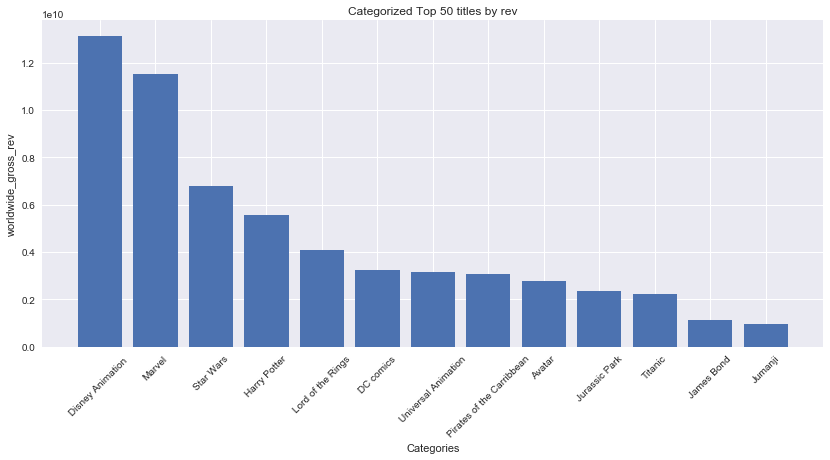

In [5]:
fig = plt.figure(figsize=(14,6))
ax = plt.subplot()
ax.bar(df_top_50_cat_grouped['movie_descr'],df_top_50_cat_grouped['worldwide_gross'])
ax.set_title('Categorized Top 50 titles by rev')
ax.set_ylabel('worldwide_gross_rev')
ax.set_xlabel('Categories')
plt.xticks(rotation=45)
plt.show()

Who are the top 5 names by worldwide revenue? Top actors/actresses?

In [8]:
df_names_rev_grouped=pd.read_csv('rev_by_name')
top_5_names = df_names_rev_grouped.nlargest(5,'worldwide_gross')
top_5_names
#keep everything above 6*10^9

,nconst,primary_name,primary_profession,worldwide_gross
0,nm0498278,Stan Lee,"producer,writer,actor",1.118786e+10
1,nm0456158,Jack Kirby,"writer,animation_department,miscellaneous",9.285562e+09
2,nm0000375,Robert Downey Jr.,"actor,producer,soundtrack",8.361736e+09
3,nm0425005,Dwayne Johnson,"actor,producer,soundtrack",6.470420e+09
4,nm0270559,Kevin Feige,"producer,miscellaneous,production_manager",6.441697e+09


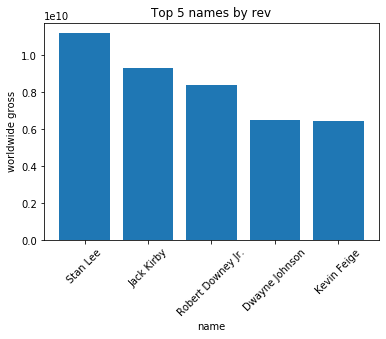

In [12]:
plt.bar(top_5_names['primary_name'],top_5_names['worldwide_gross'])
plt.title('Top 5 names by rev')
plt.xlabel('name')
plt.ylabel('worldwide gross')
plt.xticks(rotation=45)
plt.show()

In [13]:
top_100_actors=df_names_rev_grouped.loc[df_names_rev_grouped['primary_profession'].str.contains(
    'actor|actress')]
#chop at 20, likely going to be very similar to above
top_20_actors=top_100_actors.nlargest(20,'worldwide_gross')


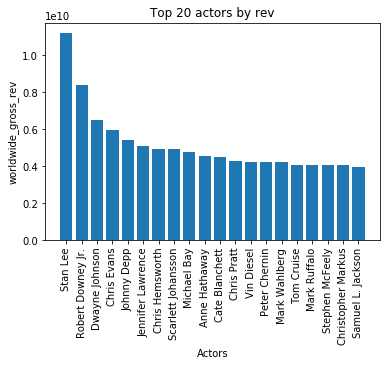

In [14]:
plt.bar(top_20_actors['primary_name'],top_20_actors['worldwide_gross'])
plt.title('Top 20 actors by rev')
plt.xlabel('Actors')
plt.ylabel('worldwide_gross_rev')
plt.xticks(rotation=90)
plt.show()

Do TMDB ratings indicate success?

In [17]:
query3= """SELECT DISTINCT title, popularity, vote_average, year(release_date) as year_release
FROM
    tmdb_movies
WHERE
    vote_average > 0 AND vote_Average < 10
        AND popularity > 0
        AND popularity < 50
ORDER BY popularity , vote_average"""
#remove outliers
df_tmdb_ratings = pd.read_sql_query(query3, con)
#popularity is an algorithm that spits out combo of votes, rate, etc to determine how popular 
#movie is right now - votes are building block

In [18]:
df_joint_rev.drop(df_joint_rev[df_joint_rev['movie_title'] == 'Avatar'].index, inplace = True)
#drop avatar because it skews this

In [21]:
df_tmdb_ratings_rev = df_tmdb_ratings.merge(df_joint_rev, how='inner', left_on=[
                                            'title', 'year_release'], right_on=['movie_title', 'release_year'])

In [24]:
df_tmdb_ratings_top100=df_tmdb_ratings_rev.nlargest(100,['vote_average'])
df_rev_top100=df_tmdb_ratings_rev.nlargest(100,['worldwide_gross'])
vote_overlap = df_tmdb_ratings_top100.merge(df_rev_top100, how='inner' )
#only 7% overlap between high reveneue and ratings - not great

Text(0, 0.5, 'WW Gross Rev')

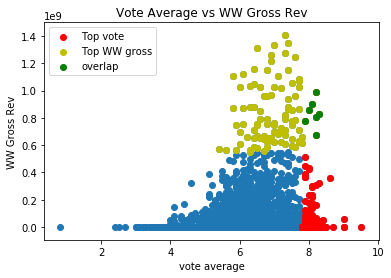

In [25]:
plt.scatter(df_tmdb_ratings_rev['vote_average'],df_tmdb_ratings_rev['worldwide_gross'])
plt.scatter( df_tmdb_ratings_top100['vote_average'],df_tmdb_ratings_top100['worldwide_gross'], c='r',label='Top vote')
plt.scatter(df_rev_top100['vote_average'],df_rev_top100['worldwide_gross'], c='y', label='Top WW gross')
plt.scatter(vote_overlap['vote_average'],vote_overlap['worldwide_gross'],c='g', label = 'overlap')
plt.legend()
plt.title('Vote Average vs WW Gross Rev')
plt.xlabel('vote average')
plt.ylabel('WW Gross Rev')

In [28]:
df_tmdb_popularity_top100=df_tmdb_ratings_rev.nlargest(100,['popularity'])
popularity_overlap = df_tmdb_popularity_top100.merge(df_rev_top100, how='inner' )

Text(0, 0.5, 'WW Gross Rev')

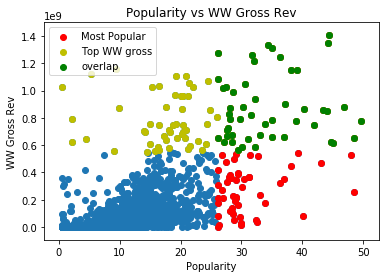

In [29]:
plt.scatter(df_tmdb_ratings_rev['popularity'],df_tmdb_ratings_rev['worldwide_gross'])
plt.scatter(df_tmdb_popularity_top100['popularity'], df_tmdb_popularity_top100['worldwide_gross'], c='r', label='Most Popular')
plt.scatter(df_rev_top100['popularity'],df_rev_top100['worldwide_gross'], c='y', label='Top WW gross')
plt.scatter(popularity_overlap['popularity'], popularity_overlap['worldwide_gross'], c='g', label='overlap')
plt.legend()
plt.title('Popularity vs WW Gross Rev')
plt.xlabel('Popularity')
plt.ylabel('WW Gross Rev')

In [30]:
popularity_overlap_title = list(popularity_overlap['title'])
popularity_overlap_title_cat = ['Marvel',
                                'Harry Potter',
                                'Marvel',
                                'Marvel',
                                'Marvel',
                                'Marvel',
                                'Marvel',
                                'Marvel',
                                'Marvel',
                                'Marvel',
                                'Marvel',
                                'Marvel',
                                'Marvel',
                                'DC Comics',
                                'Bohemian Rhapsody',
                                'Disney Animation',
                                'Disney Animation',
                                'Marvel',
                                'Jurassic Park',
                                'DC Comics',
                                'Star Wars',
                                'Hunger Games',
                                'Marvel',
                                'Star Wars',
                                'Hangover',
                                'Marvel',
                                'Disney Animation',
                                'DC Comics',
                                'Marvel',
                                'Pirates of the Caribbean',
                                'James Bond',
                                'Ready Plater One',
                                'Mission Impossible',
                                'King Kong',
                                'Disney Animation',
                                'Marvel',
                                'Interstellar',
                                'Pirates of the Caribbean',
                                'DC Comics',
                                'Inception',
                                'Gravity',
                                'DC Comics',
                                'Planet of the Apes ',
                                'Disney Animation',
                                'Dreamworks',
                                'Lord of the Rings',
                                'DC Comics',
                                'Disney Animation',
                                'Marvel', ]
count = [1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1,
         1, ]
popularity_overlap = {'popularity_overlap_title': popularity_overlap_title,
                      'popularity_overlap_title_cat': popularity_overlap_title_cat, 'count': count}
popularity_overlap = pd.DataFrame(popularity_overlap)
popularity_overlap_count = popularity_overlap.groupby(
    ['popularity_overlap_title_cat']).sum().sort_values(by=['count'], ascending=False)
popularity_overlap_count=popularity_overlap_count.reset_index()

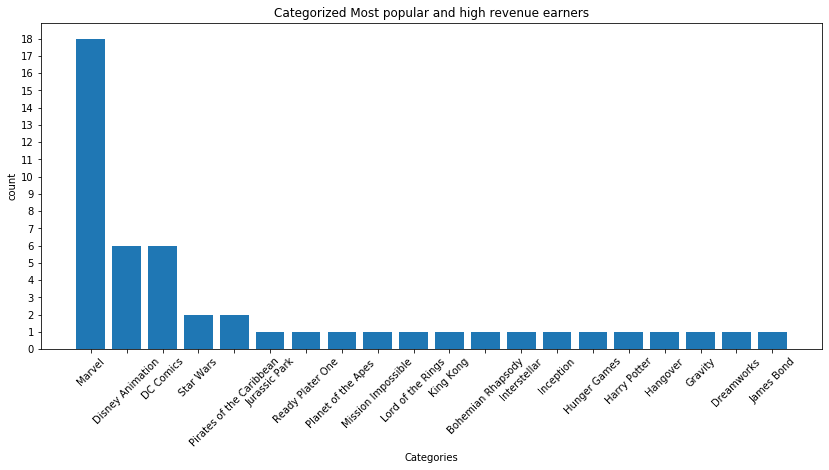

In [33]:
fig = plt.figure(figsize=(14,6))
ax = plt.subplot()
ax.bar(popularity_overlap_count['popularity_overlap_title_cat'],popularity_overlap_count['count'])
ax.set_title('Categorized Most popular and high revenue earners')
ax.set_ylabel('count')
ax.set_xlabel('Categories')
plt.xticks(rotation=45)
plt.yticks(ticks=range(0,19))
plt.show()